# Exploratory Data analysis of Student Performance Dataset

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('student.csv')

## Insight 1
- The dataset contains **8 columns** and **1000 records**
- Four are Categorical Features and 3 are numerical Features

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [84]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [85]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [86]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [87]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight 2
- There is not any missing values in the dataset
- Duplicates are also not present in the dataset

**About Gender**
1. 2 Gender Mentioned *Male* and *Female*

**About race_ethnicity**
In total 5 different ethnicity are mentioned:
1. Group('A', 'B', 'C', 'D', 'E')

**About parental_level_of_education**
In total 6 different level of education are mentioned:
1. "bachelor's degree"
2. 'some college'
3. "master's degree"
4.  "associate's degree
5.  'high school
6.  'some high school

**About Lunch**
There are two type of lunch found
1. Standard
2. Free/reduced

**About test_preparation_course**
Tells the status of completion

**Features like :** math_score, reading_score, writing_score tell use about the marks scored by each student in those subject respectively.'


In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [18]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']

In [19]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [20]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [21]:
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Checking the Imbalance in the dataset
The dataset is *pretty much balanced*, it dosen't seem to be Imbalance

In [22]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [23]:
df.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [24]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

#### Scores Grouped by Categorical Features to see the performance of students

In [88]:
def group_by_mean(f1,f2):
    df2=df[[f1,f2]].groupby([f2]).mean()
    print(df2)

In [89]:
group_by_mean('reading_score','gender')

        reading_score
gender               
female      72.608108
male        65.473029


In [90]:
group_by_mean('writing_score','gender')

        writing_score
gender               
female      72.467181
male        63.311203


In [91]:
group_by_mean('math_score','race_ethnicity')

                math_score
race_ethnicity            
group A          61.629213
group B          63.452632
group C          64.463950
group D          67.362595
group E          73.821429


In [92]:
group_by_mean('reading_score','race_ethnicity')

                reading_score
race_ethnicity               
group A             64.674157
group B             67.352632
group C             69.103448
group D             70.030534
group E             73.028571


In [93]:
group_by_mean('writing_score','race_ethnicity')

                writing_score
race_ethnicity               
group A             62.674157
group B             65.600000
group C             67.827586
group D             70.145038
group E             71.407143


#### Added a new metric total_score and average to ease out the analysis

In [95]:
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])

In [96]:
df['average'] = df['total_score']/3

In [97]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Visualizations

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='average', ylabel='Count'>

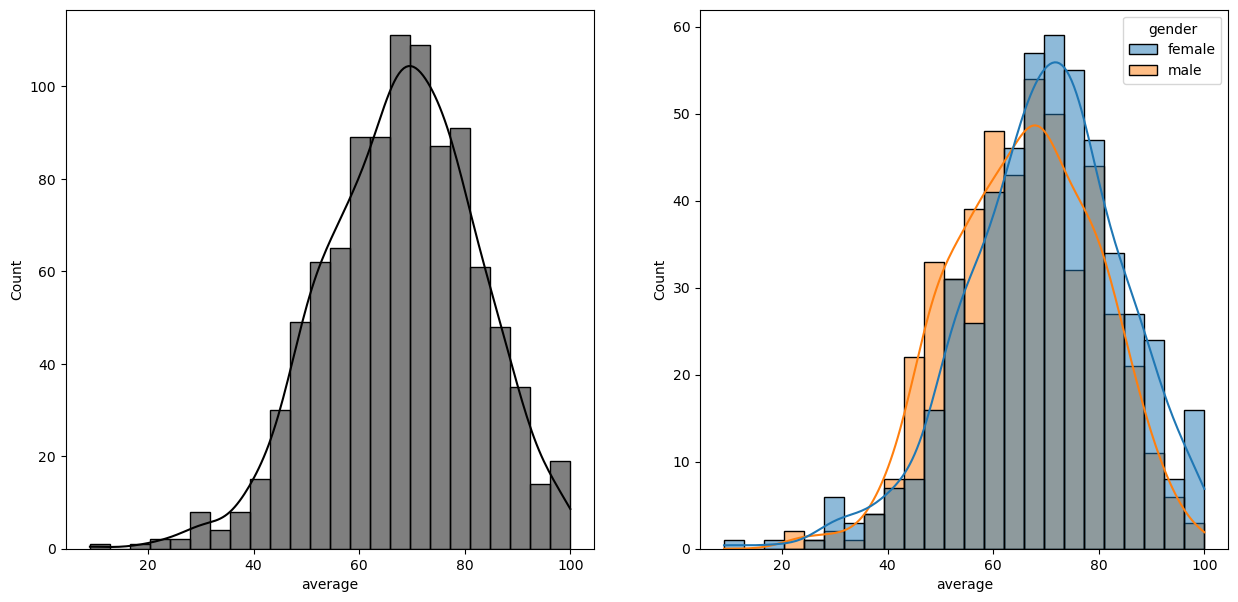

In [99]:

fig,axis= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x='average',kde=True, color='black')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

## Insight 3
From the aboe graph we can conclude that
1. The data is normally distributed
2. Females are good in scoring in exams

In [103]:
def subplot_cat_features(f1):
    fig,axis= plt.subplots(1,3,figsize=(25,6))
    plt.subplot(131) 
    sns.histplot(data = df, x='average',kde=True, hue=f1)
    
    plt.subplot(132)
    plt.title('Male')
    sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue=f1)
    
    plt.subplot(133)
    plt.title('Female')
    sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue=f1)

## Insight 4
From the below, distribution of **parental_level_of_education** we can see
1. Masters degree have great impact in score of students
2. Followed by Bachelor's degree impact score more
3. Rest the features are normally distribued and have the similar impact

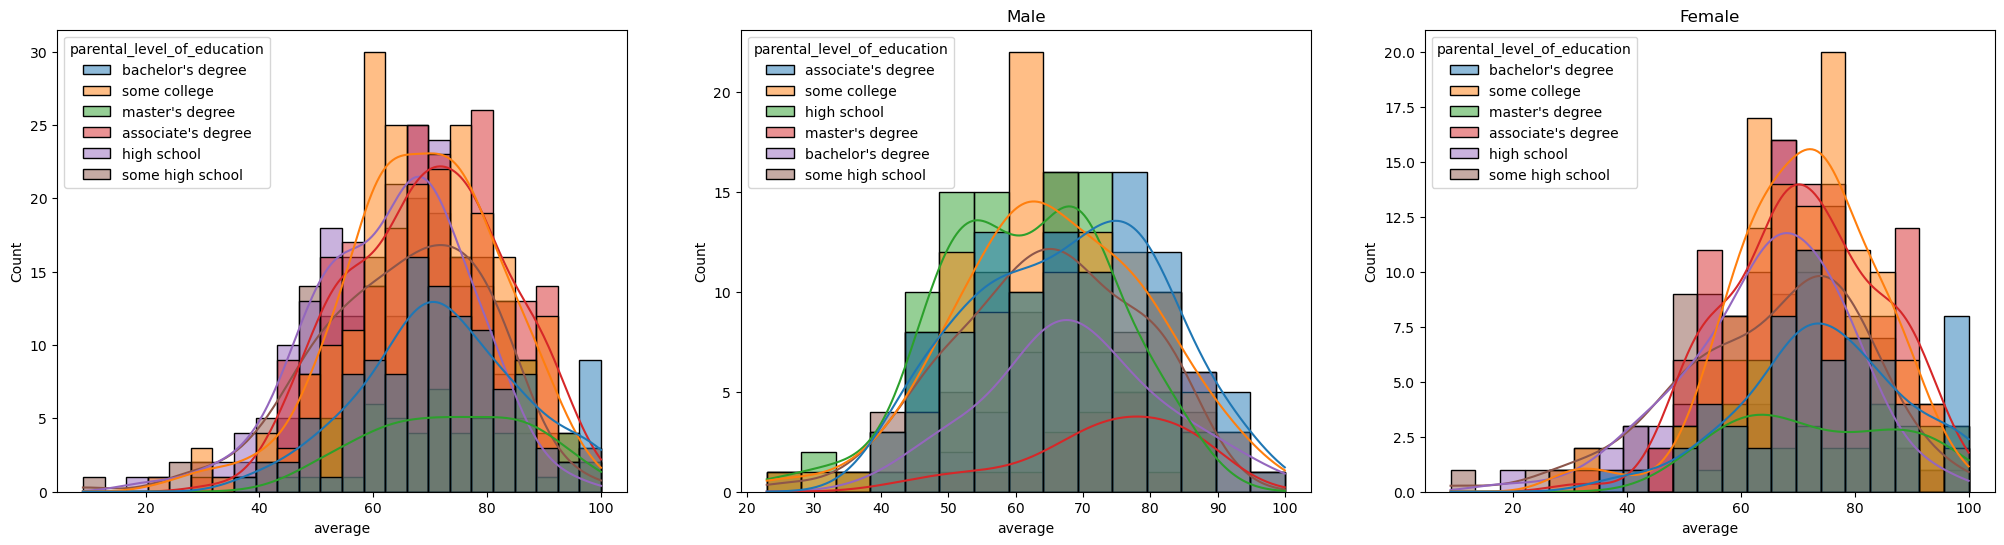

In [108]:
subplot_cat_features('parental_level_of_education')

## Insight 4
From the below, distribution of **Lunch** we can see
1. Student having Standard meals are performing well with scores

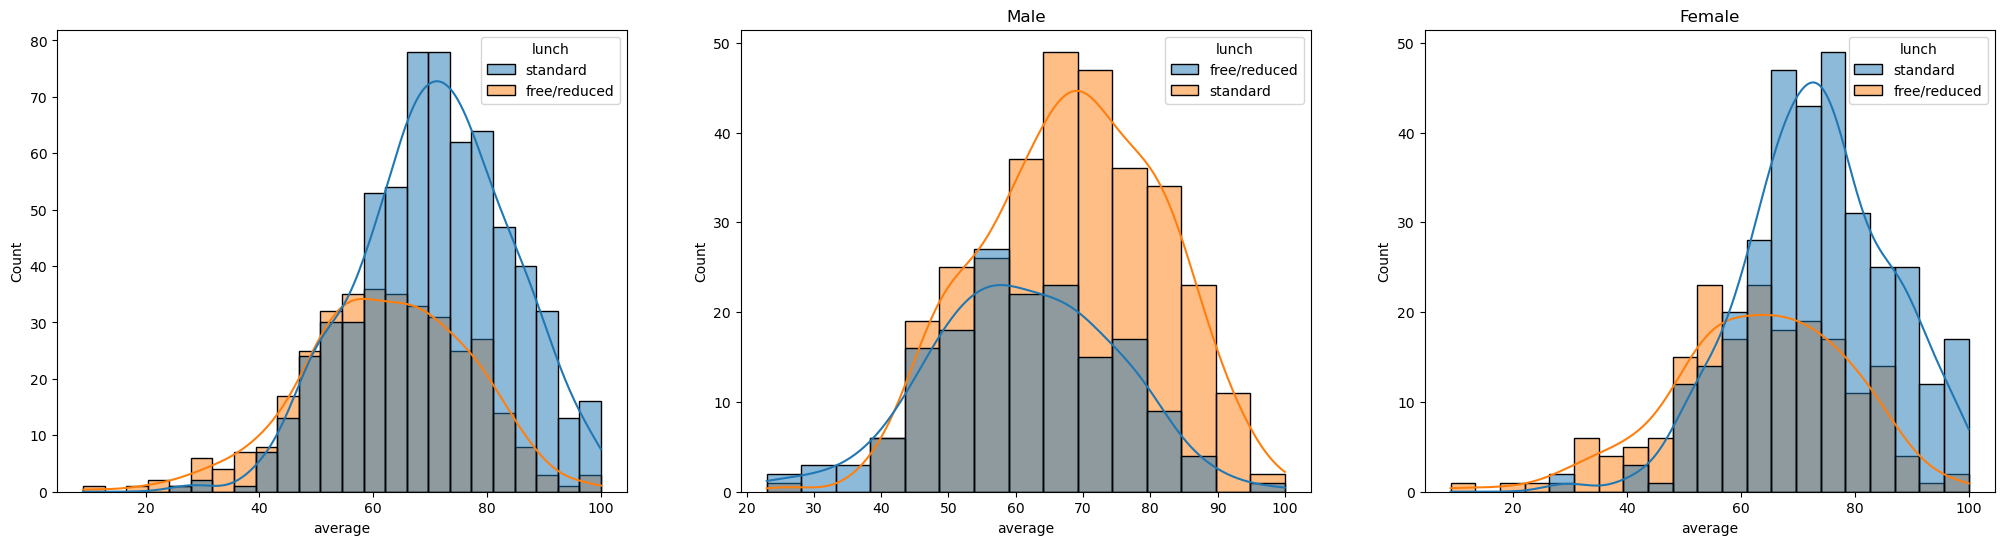

In [105]:
subplot_cat_features('lunch')

# Insight 5
1. The Group A,B data is a bit left skewed which show less scores
2. The Group E males are performing well than other groups
3. Remaing Group C,D are normally distributed and performing average

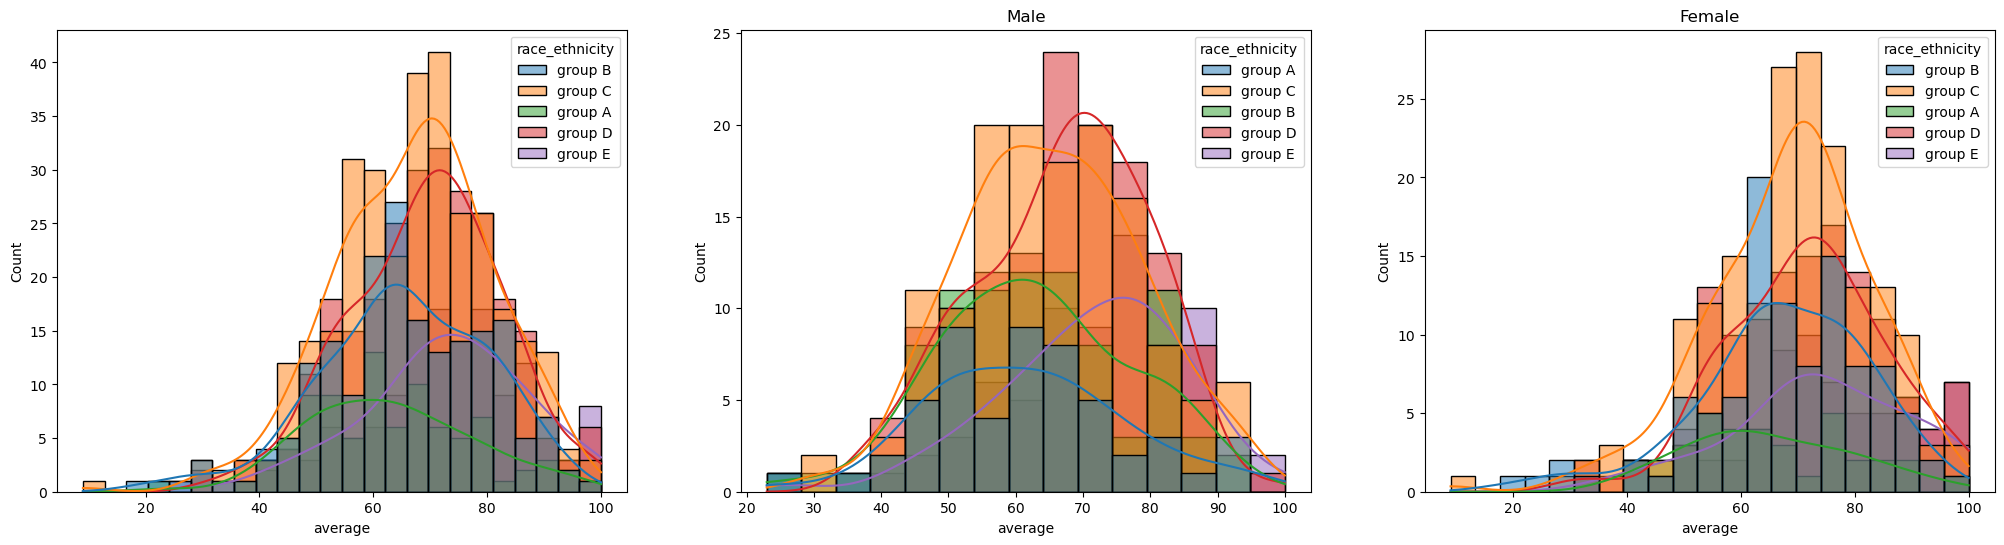

In [109]:
subplot_cat_features('race_ethnicity')

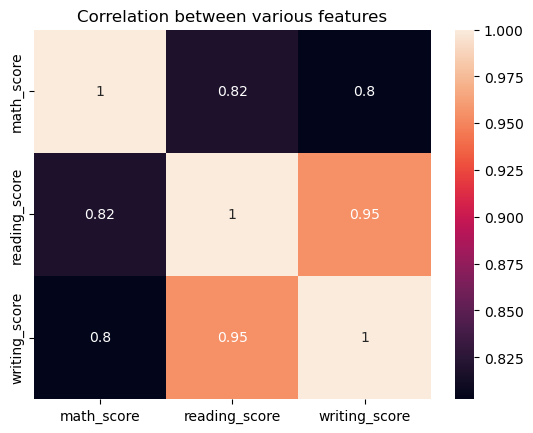

In [112]:
sns.heatmap(df[numerical_features].corr(),annot=True)
plt.title("Correlation between various features")
plt.show()